In [1]:
## notes

## clean data:
    # lots of null values
    # drop rows with null values in 'RainTomorrow' (prediction value)
    # do the dates need formatting???
    
## EDA:
    # line plots showing rainfall trends in different areas
    # countplot for RainToday, RainTomorrow
    # averages for rainfall and other climate factors in different areas
    # heatmap for correlation between climate factors
    # scatterplots may be useful to show correlation as well
    
## Feature Engineering:
    # get dummies for categorical data (Wind speed/direction columns)
    # change Yes/No values in RainToday/Tomorrow to 0/1 values for model engineering
    # select usable columns.. omit location. Date may be useful (unsure)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_csv('/Users/AlexDutchak/Desktop/Python/Kaggle/Kaggle_Databases/weatherAUS.csv')
df.shape

(145460, 23)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
# check percentage of null values in each column

null_sum = list(zip(df.columns, df.isnull().sum()))

print('Null values in each column:\n')
for ns in null_sum:
    print(f'{ns[0]}: {ns[1]}/{df.shape[0]} --> {int((ns[1]/df.shape[0]) * 100)}%')

Null values in each column:

Date: 0/145460 --> 0%
Location: 0/145460 --> 0%
MinTemp: 1485/145460 --> 1%
MaxTemp: 1261/145460 --> 0%
Rainfall: 3261/145460 --> 2%
Evaporation: 62790/145460 --> 43%
Sunshine: 69835/145460 --> 48%
WindGustDir: 10326/145460 --> 7%
WindGustSpeed: 10263/145460 --> 7%
WindDir9am: 10566/145460 --> 7%
WindDir3pm: 4228/145460 --> 2%
WindSpeed9am: 1767/145460 --> 1%
WindSpeed3pm: 3062/145460 --> 2%
Humidity9am: 2654/145460 --> 1%
Humidity3pm: 4507/145460 --> 3%
Pressure9am: 15065/145460 --> 10%
Pressure3pm: 15028/145460 --> 10%
Cloud9am: 55888/145460 --> 38%
Cloud3pm: 59358/145460 --> 40%
Temp9am: 1767/145460 --> 1%
Temp3pm: 3609/145460 --> 2%
RainToday: 3261/145460 --> 2%
RainTomorrow: 3267/145460 --> 2%


In [6]:
# There are 4 columns that have greater then 30% missing values
# These need to be dropped, as we cannot get any useful information with such inconsistency
# BUT first I will drop rows with null values in RainTomorrow, reducing the num rows by 2%

df = df.drop(df[df['RainTomorrow'].isna()].index)

df.shape

(142193, 23)

In [7]:
df = df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])
print(df.shape)
df.head()

(142193, 19)


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [8]:
# check Date format

df['Date'].dtypes

dtype('O')

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

df['Date'].head()

0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]

In [10]:
## EXPLORATORY DATA ANALYSIS

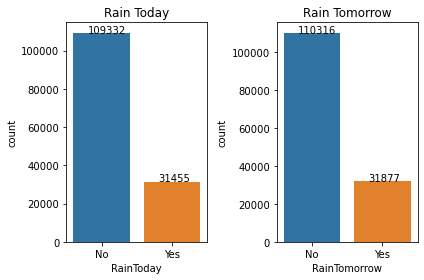

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax = ax.flatten()

ax[0].set_title('Rain Today')
sns.countplot(x = df['RainToday'], ax=ax[0])
ax[1].set_title('Rain Tomorrow')
sns.countplot(x = df['RainTomorrow'], ax=ax[1])

for i, j in enumerate(df['RainToday'].value_counts()):
    ax[0].text(x=i-0.2, y=j, s=str(int(j)))
    
for i, j in enumerate(df['RainTomorrow'].value_counts()):
    ax[1].text(x=i-0.2, y=j, s=str(int(j)))

plt.tight_layout()

In [12]:
## there appears to be correlation between these two columns

In [13]:
# Let's get a list of unique locations in the dataset

locations = df['Location'].unique()

print(f'Length of list: locations --> {len(locations)}\n')
print(locations)

Length of list: locations --> 49

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [14]:
# creating a Month column for easily plotting trends over the course of just one year

# df['Month'] = pd.DatetimeIndex(df['Date']).month

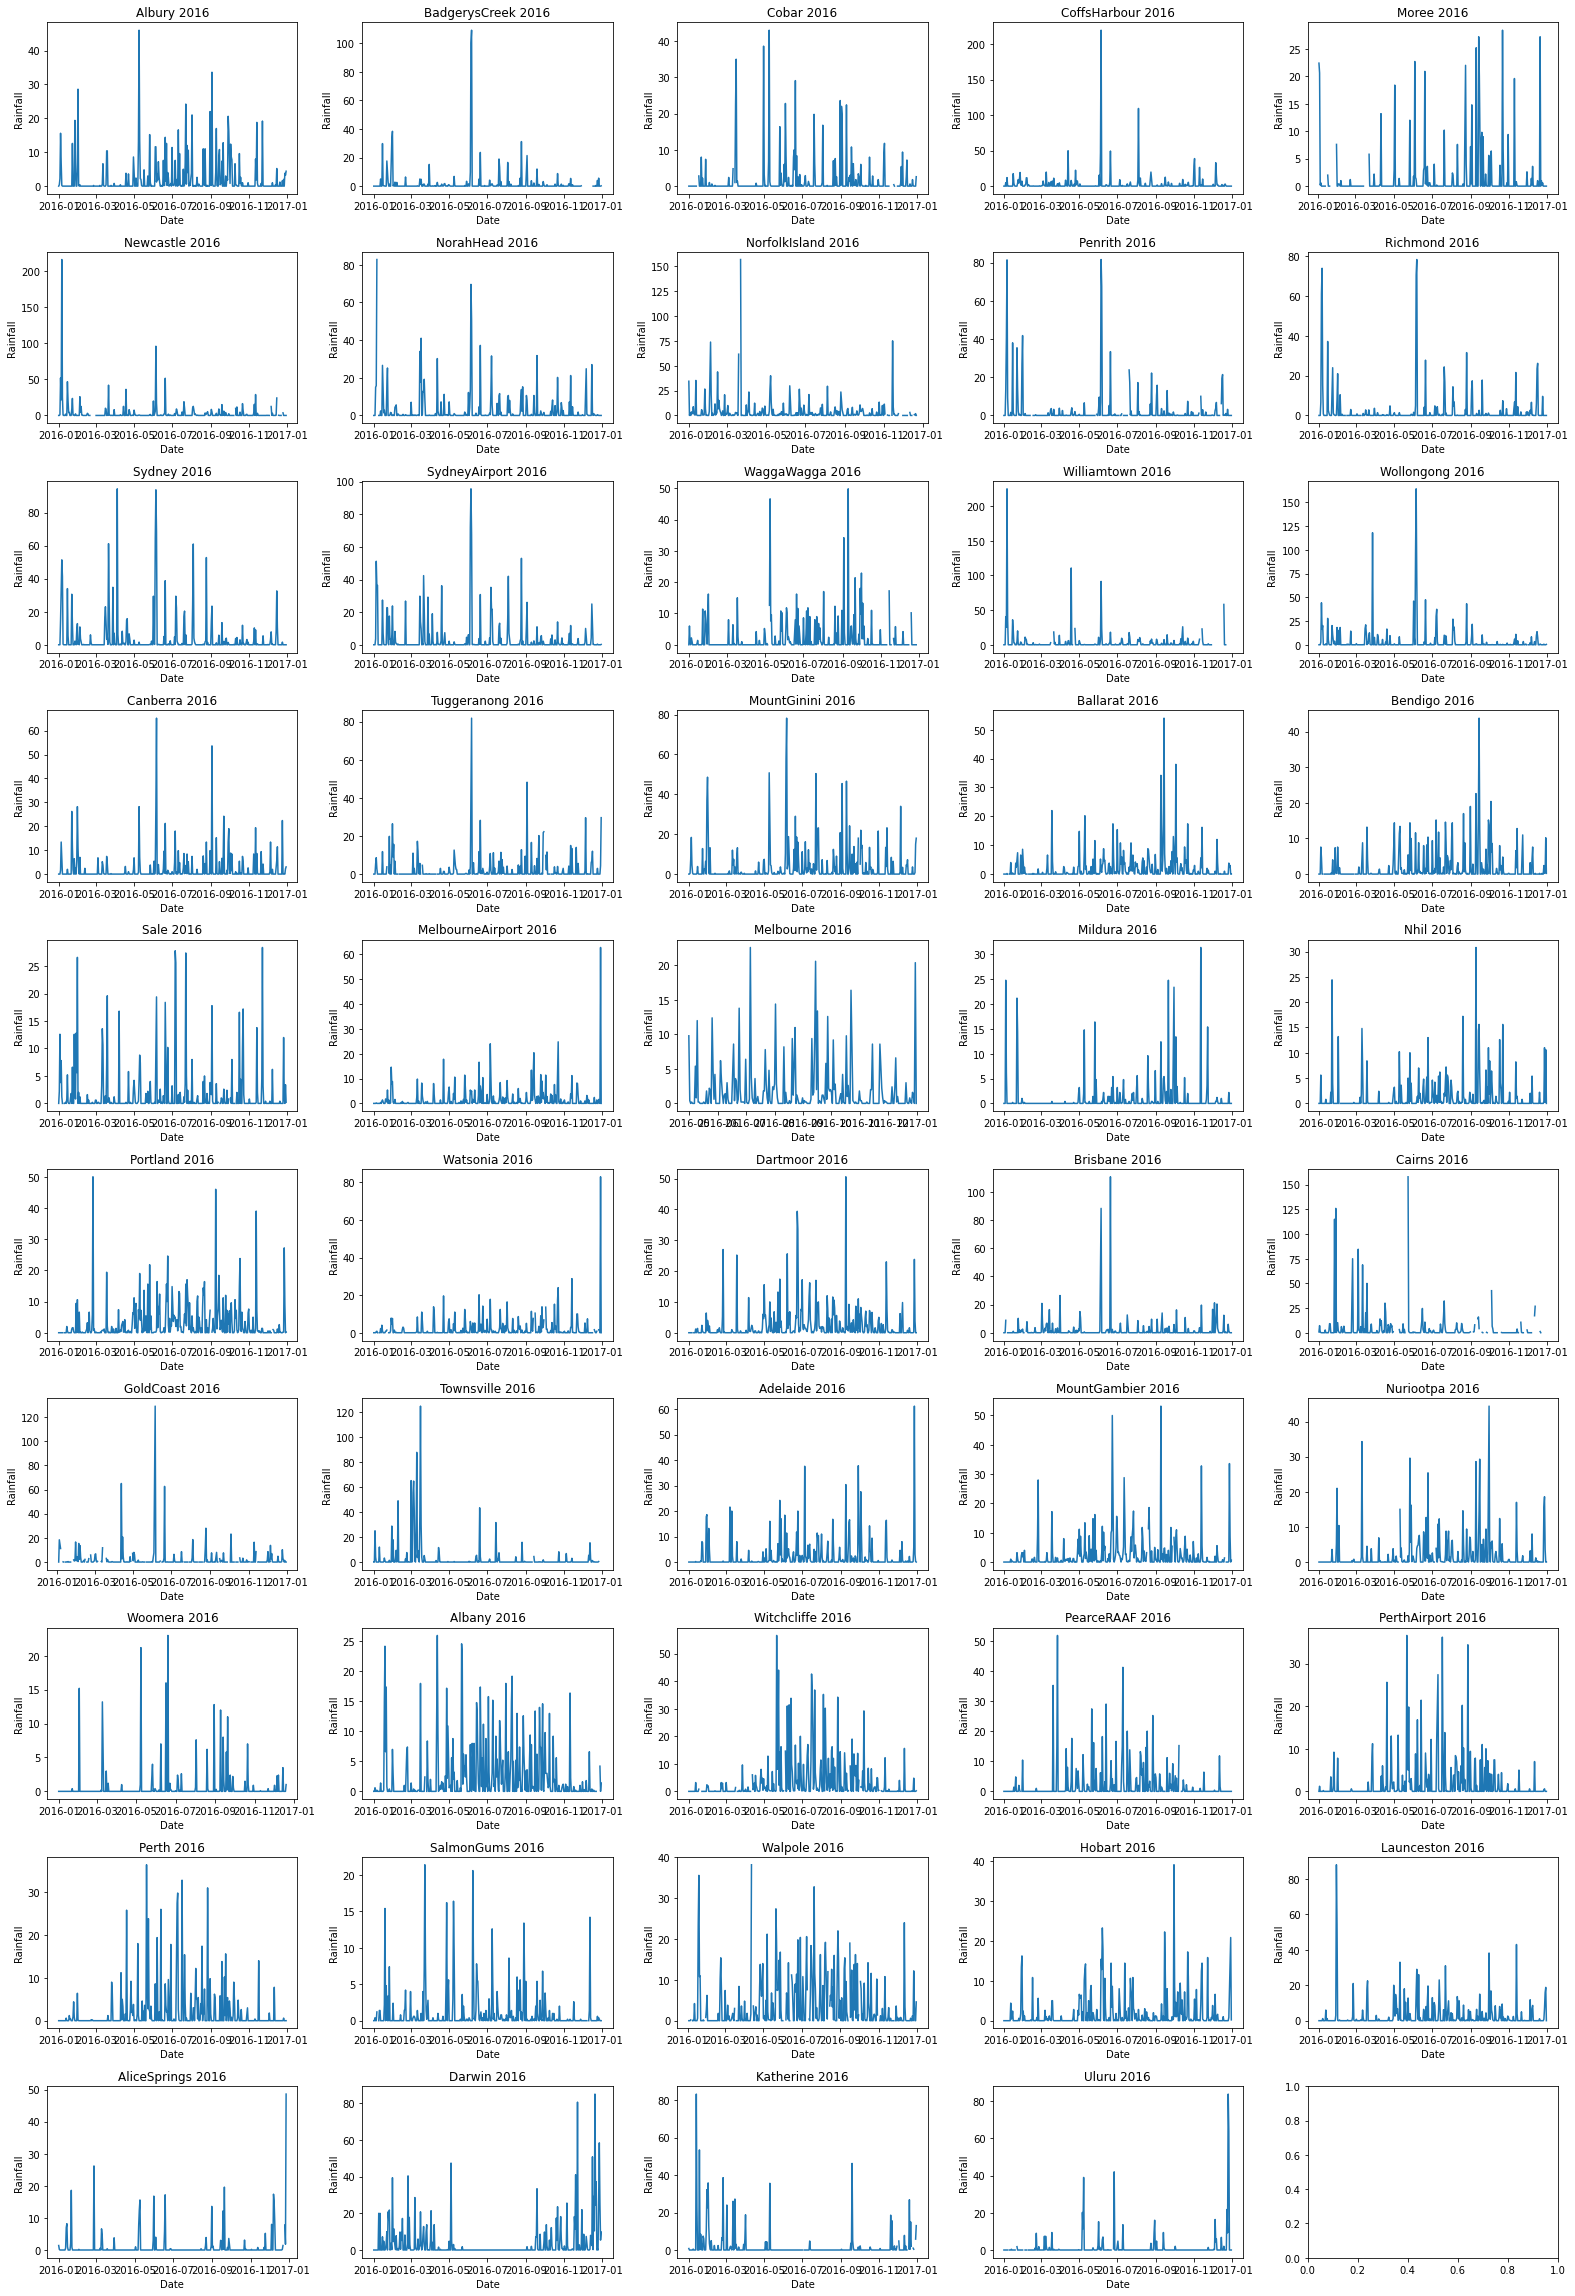

In [15]:
# function for plotting rainfall trends in all 49 locations

def rainfall_by_location(df, locations, start, end, rows=10, columns=5):
    
    fig, axes = plt.subplots(rows, columns, figsize=(22, 32))
    axes = axes.flatten()
    
    for i, j in zip(locations, axes):
        
        mask = (df['Location'] == i) & (df['Date'] >= start) & (df['Date'] <= end)
        
        x_val = df[mask]['Date'].values
        y_val = df[mask]['Rainfall'].values
        
        sns.lineplot(x=x_val, y=y_val, ax=j)
        
        j.set_title(f'{i} {start[:4]}')
        j.set_xlabel('Date')
        j.set_ylabel('Rainfall')
        
    plt.tight_layout()
    
locations = df['Location'].unique()

rainfall_by_location(df, locations, '2016-01-01', '2016-12-31')

In [16]:
# I need to make the data in RainToday and RainTomorrow numerical for correlation and prediction

df['RainToday'] = df['RainToday'].map(lambda x: 1 if x == 'Yes' else 0)
df['RainTomorrow'] = df['RainTomorrow'].map(lambda x: 1 if x == 'Yes' else 0)

print(df['RainToday'].value_counts())
print(df['RainTomorrow'].value_counts())

0    110738
1     31455
Name: RainToday, dtype: int64
0    110316
1     31877
Name: RainTomorrow, dtype: int64


<AxesSubplot:title={'center':'Correlation between columns'}>

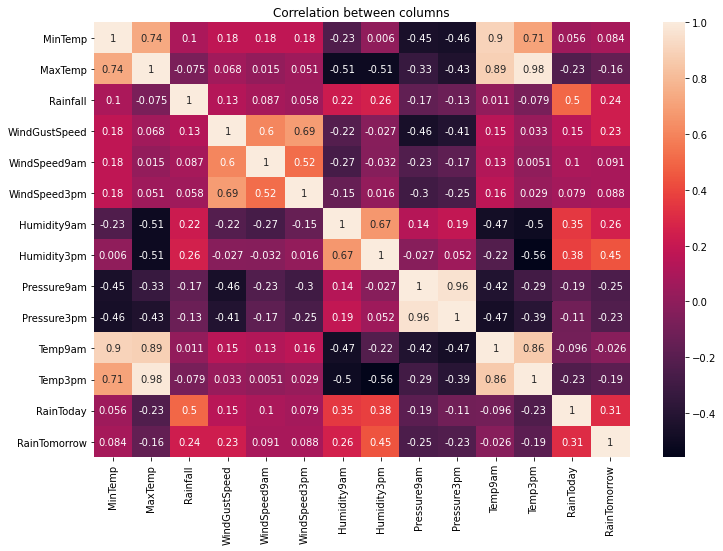

In [17]:
# heatmap for correlation

plt.figure(figsize=(12, 8))
plt.title('Correlation between columns')
sns.heatmap(df.corr(), annot=True)

In [18]:
## Humidity at 3pm seems to have the highest correlation with RainTomorrow AND RainToday

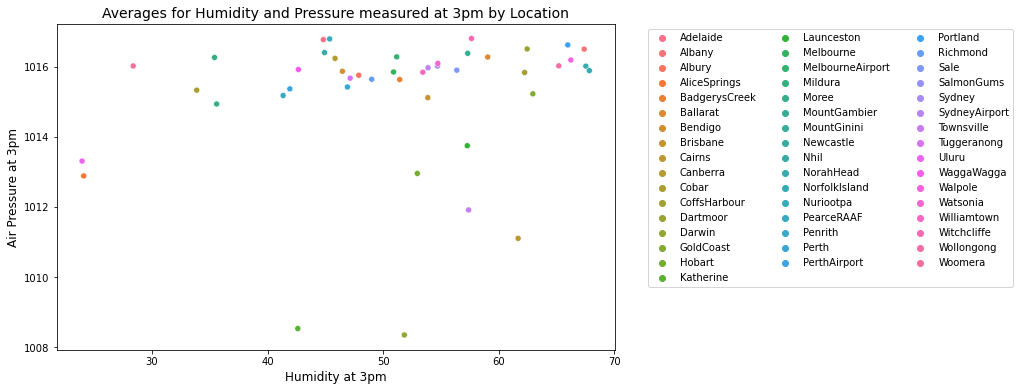

In [19]:
# there's too many locations for a scatterplot here to be very useful

hum_pres_corr = df.groupby('Location')[['Humidity3pm', 'Pressure3pm']].mean()

plt.figure(figsize=(10, 6))
plt.title('Averages for Humidity and Pressure measured at 3pm by Location', fontsize=14)
sns.scatterplot(x=hum_pres_corr.Humidity3pm, y=hum_pres_corr.Pressure3pm, hue=hum_pres_corr.index)
plt.xlabel('Humidity at 3pm', fontsize=12)
plt.ylabel('Air Pressure at 3pm', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), ncol=3)
plt.show()

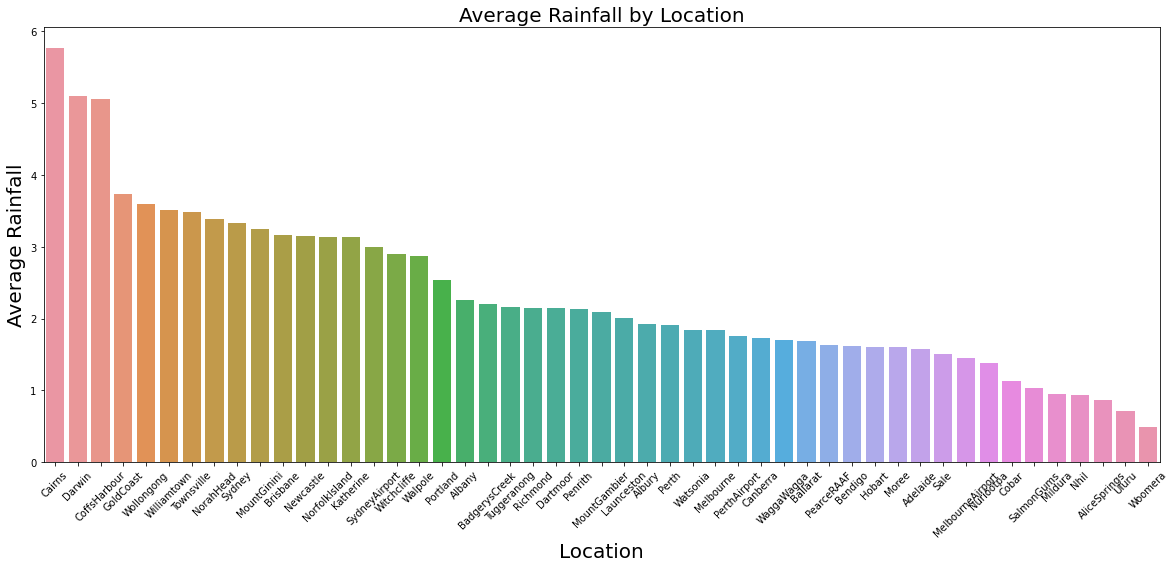

In [20]:
# average rainfall in each location over the duration of the dataset (~9 years)

rainfall_avg = df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
plt.title('Average Rainfall by Location', fontsize=20)
sns.barplot(x=rainfall_avg.index, y=rainfall_avg.values)
plt.xlabel('Location', fontsize=20)
plt.ylabel('Average Rainfall', fontsize=20)
plt.xticks(rotation=45)
plt.show()

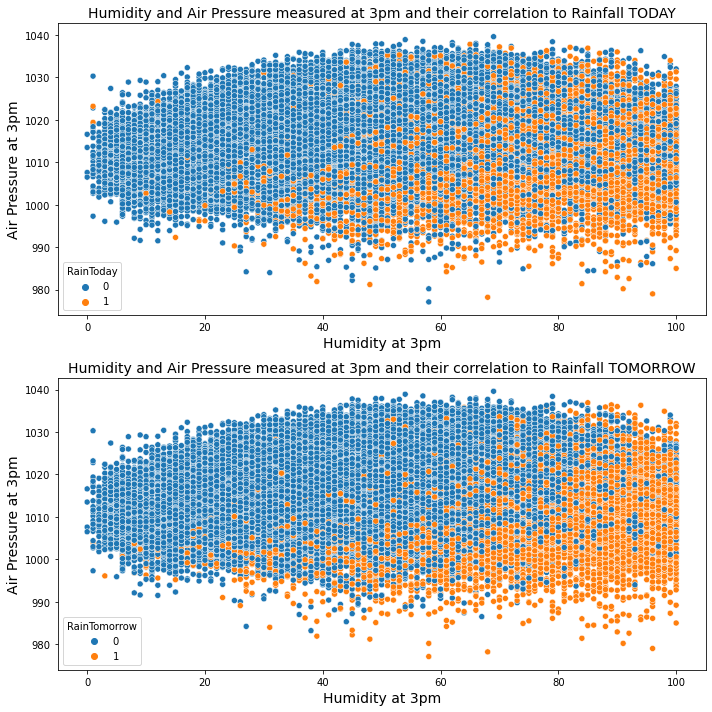

In [21]:
# going to redo the scatterplot from earlier, but using raintoday and raintomorrow as 'hue'

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.title('Humidity and Air Pressure measured at 3pm and their correlation to Rainfall TODAY', fontsize=14)
sns.scatterplot(x=df['Humidity3pm'], y=df['Pressure3pm'], hue=df['RainToday'])
plt.xlabel('Humidity at 3pm', fontsize=14)
plt.ylabel('Air Pressure at 3pm', fontsize=14)

plt.subplot(212)
plt.title('Humidity and Air Pressure measured at 3pm and their correlation to Rainfall TOMORROW', fontsize=14)
sns.scatterplot(x=df['Humidity3pm'], y=df['Pressure3pm'], hue=df['RainTomorrow'])
plt.xlabel('Humidity at 3pm', fontsize=14)
plt.ylabel('Air Pressure at 3pm', fontsize=14)

plt.tight_layout()

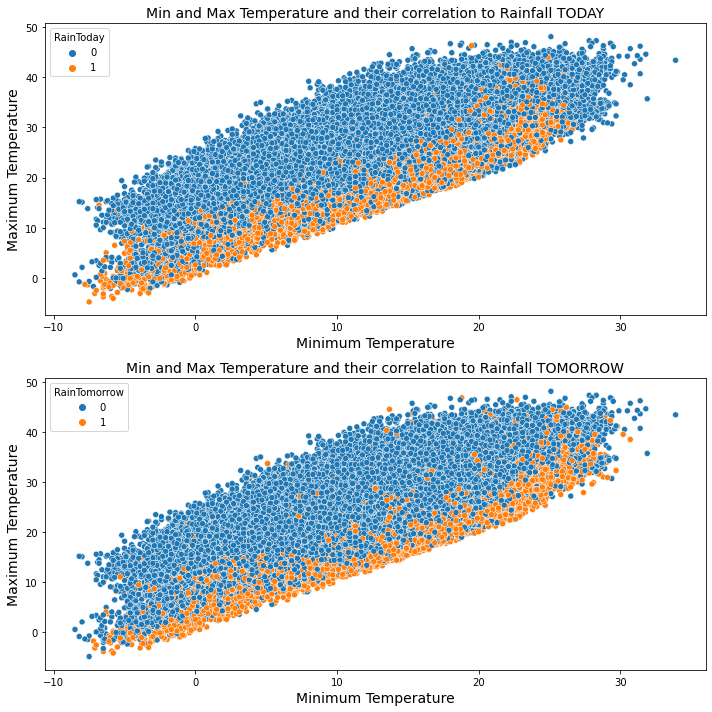

In [22]:
# let's see if MinTemp and MaxTemp have any correlation with rain

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.title('Min and Max Temperature and their correlation to Rainfall TODAY', fontsize=14)
sns.scatterplot(x=df['MinTemp'], y=df['MaxTemp'], hue=df['RainToday'])
plt.xlabel('Minimum Temperature', fontsize=14)
plt.ylabel('Maximum Temperature', fontsize=14)

plt.subplot(212)
plt.title('Min and Max Temperature and their correlation to Rainfall TOMORROW', fontsize=14)
sns.scatterplot(x=df['MinTemp'], y=df['MaxTemp'], hue=df['RainTomorrow'])
plt.xlabel('Minimum Temperature', fontsize=14)
plt.ylabel('Maximum Temperature', fontsize=14)

plt.tight_layout()

In [23]:
## It appears that lower or possibly more median temperatures
## have more correlation with rainfall

In [24]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

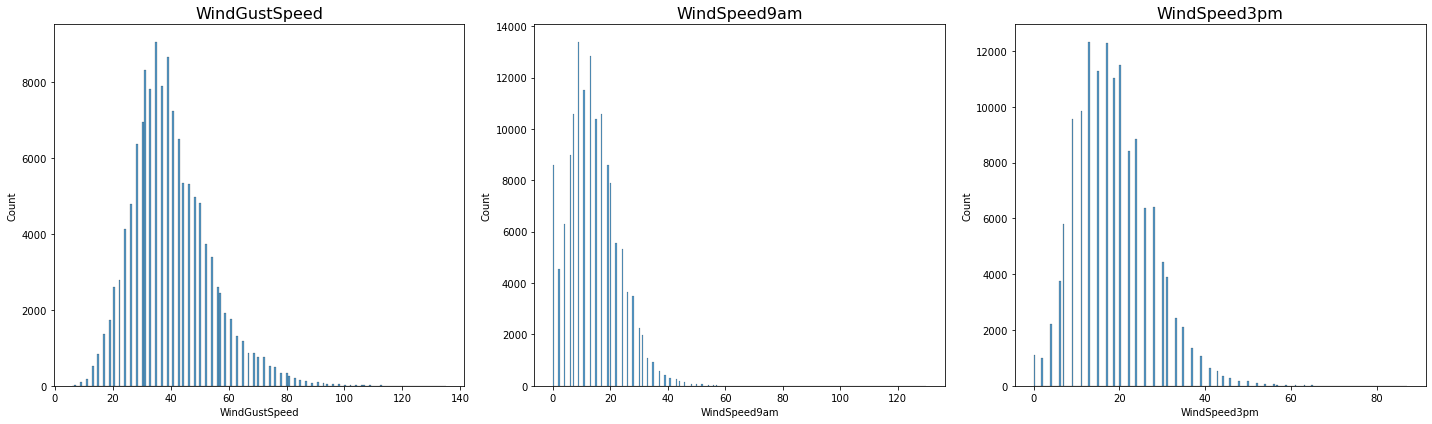

In [25]:
def create_histograms(df, cols, rows=1, columns=3):
    
    fig, axes = plt.subplots(rows, columns, figsize=(20, 6))
    axes = axes.flatten()
    
    for i, j in zip(cols, axes):
        
        sns.histplot(df[i], ax=j)
        
        j.set_title(i, fontsize=16)
        
    plt.tight_layout()
    
cols=['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

create_histograms(df, cols)

In [26]:
## Histograms show a natural bell curve, with only a few outliers

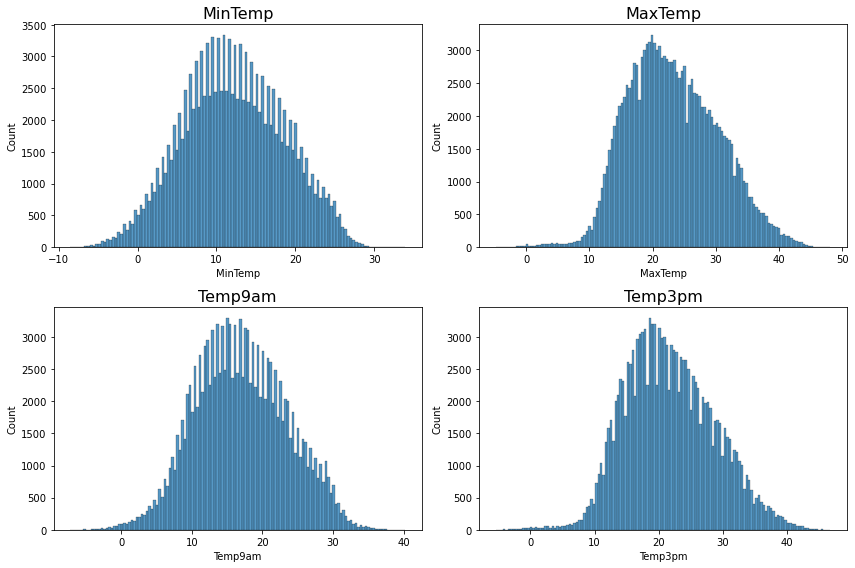

In [28]:
# I will create histograms for temperature columns as well

def create_histograms(df, cols, rows=2, columns=2):
    
    fig, axes = plt.subplots(rows, columns, figsize=(12, 8))
    axes = axes.flatten()
    
    for i, j in zip(cols, axes):
        
        sns.histplot(df[i], ax=j)
        
        j.set_title(i, fontsize=16)
        
    plt.tight_layout()
    
cols=['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']

create_histograms(df, cols)

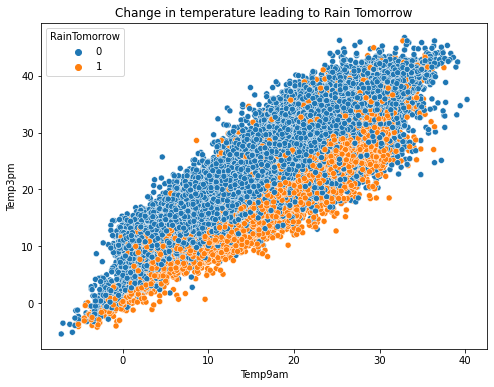

In [31]:
# this scatterplot should show us that the temperature drops between 9 am and 3 pm if there IS RainTomorrow

plt.figure(figsize=(8, 6))
plt.title('Change in temperature leading to Rain Tomorrow', fontsize=12)
sns.scatterplot(x=df['Temp9am'], y=df['Temp3pm'], hue=df['RainTomorrow'], data=df)
plt.show()

In [32]:
## Here you can see the thick cluster of orange representing RainTomorrow(YES)
    # where the temperature at 9 am is high
    # but if the temperature stays high at 3pm, it is less likely to rain the next day
## median to low temperatures at 3pm signifies a higher chance of rain the next day, 
    # especially if it drops between 9am and 3pm